# Objective 

In this tutorial, we will be embarking on a large endeavor to compare theory and experiment in the context of gene expression in *E. coli*. In lecture, we derived a mathematical prediction of how the expression of a reporter gene (YFP) should change in response to increasing copy number of the LacI repressor. Here, we will make plots of our predictions as well as go through all the data analysis needed to plot the data on top of our theory to see how they compare.

# Part 1: Using phase images to get segmentation masks

At the end of the day, we are interesting in determining the amount of YFP expression in *E. coli* with varying copy numbers of the repressor, LacI. Before we can assess the amount of fluorescence, we first need to find where the cell are in the images. To do this, it's important to use a channel that is independent of the reporter gene, so we will be using phase images to get our segmentation masks. 

## 1.1: Background subtraction

Let's first look at a sample image.

In [1]:
# import the usual 
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
%matplotlib inline

# for nice plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(style='ticks', rc=rc)

# show images in viridis by default
plt.rcParams['image.cmap'] = 'viridis'

# for extracting filenames
import glob

# skimage submodules we need
import skimage.io
import skimage.measure
import skimage.filters
import skimage.exposure

First, we need to download the image files from the RP lab course data.

In [2]:
r=requests.get('http://rpdata.caltech.edu/courses/course_data/lacI_titration.zip')

filename = "laci_data.zip"
with open(filename, mode="wb") as localfile:
  localfile.write(r.content)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

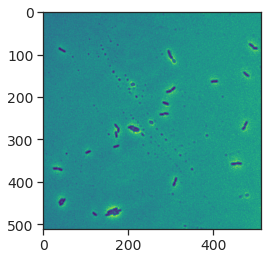

In [3]:
# Read an example phase contrast image
im = skimage.io.imread('lacI_titration/O2_R124_phase_pos_02.tif')

# Show the image
plt.imshow(im)